# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [2]:
# It's always a great idea to remember which bersion of tensorflow was used:

import tensorflow as tf
tf.__version__

'1.1.0'

### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [3]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


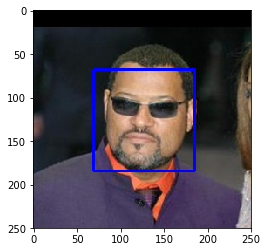

In [4]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before moving forward let's learn a bit more about our data.

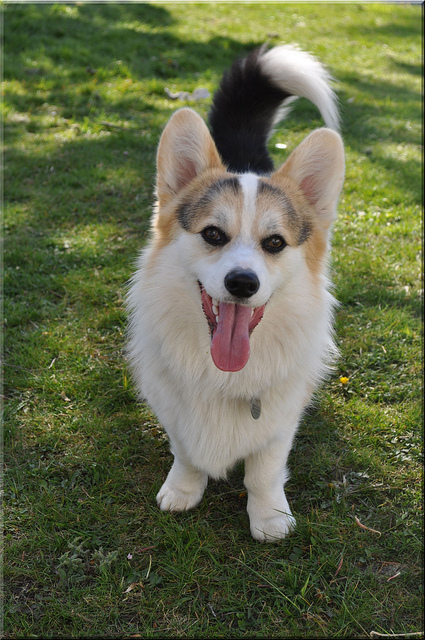

In [5]:
from IPython.display import Image
Image(train_files[100])

In [6]:
# Nice dog! What image format is used:

train_files[100]

'dogImages/train\\045.Cardigan_welsh_corgi\\Cardigan_welsh_corgi_03216.jpg'

In [7]:
# Probably the same info about human pix...
human_files[7770]

'lfw\\Ariel_Sharon\\Ariel_Sharon_0055.jpg'

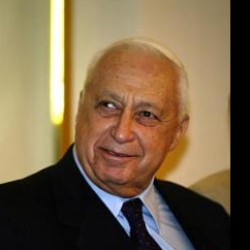

In [8]:
# And here is Mr Sharon's portrait:
Image(human_files[7770])

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [9]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

In [10]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

count = 0

for img in human_files_short:
    if face_detector(img):
        count += 1
print ("The percentage of the first 100 images in the human face datasets with a detected human face is:")
print (count/len(human_files_short))

The percentage of the first 100 images in the human face datasets with a detected human face is:
0.99


One person was misclassified - this could be a problem!

In [12]:
count = 0

for img in dog_files_short:
    if face_detector(img):
        count += 1
print ("The percentage of the first 100 images in the dog datasets which were counted as a human face is:")
print (count/len(dog_files_short))

The percentage of the first 100 images in the dog datasets which were counted as a human face is:
0.11


11 per cent seems a bad accuracy indeed, however I don't think the misclassifed dogs would be angry about this. I am much less certain about humans. Let's investigate how serious the problem is:

In [13]:
# in the 1st thousand problem images are:

for ind in range(1000):
    img = human_files[ind]
    if not face_detector(img):
        print ('misclassified human image has index = ', ind)

misclassified human image has index =  0
misclassified human image has index =  141
misclassified human image has index =  163
misclassified human image has index =  341
misclassified human image has index =  693
misclassified human image has index =  917
misclassified human image has index =  921
misclassified human image has index =  982


In [14]:
for ind in range(100):
    img = train_files[ind]
    if face_detector(img):
        print ('human-like dog image has index = ', ind)

human-like dog image has index =  0
human-like dog image has index =  14
human-like dog image has index =  15
human-like dog image has index =  21
human-like dog image has index =  22
human-like dog image has index =  23
human-like dog image has index =  24
human-like dog image has index =  30
human-like dog image has index =  32
human-like dog image has index =  63
human-like dog image has index =  78


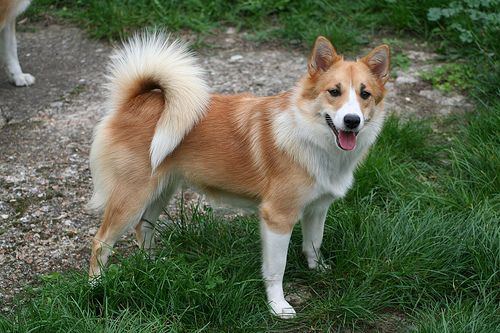

In [15]:
# I don't understand what's wrong with this image of a dog:

Image(train_files[78])

In [16]:
# However, face detector is unambiguous:
face_detector(train_files[78])

True

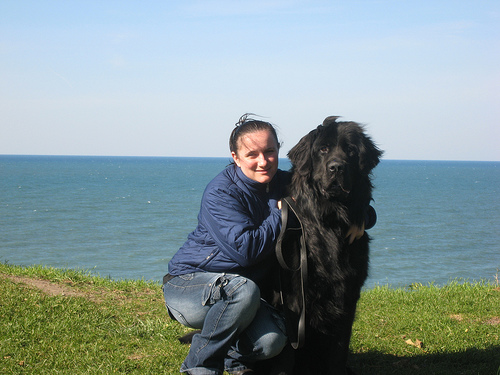

In [17]:
# In some cases the dog image also includes an image of a person, so the face detector was absolutely correct in this case:

Image(train_files[23])

__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__
The rubrik says: "The submission opines whether Haar cascades for face detection are an appropriate technique for human detection." Well, it depends. In principle, accuracy of over 99% is good for most practical purposes. Still, public use of the algorithm is way too dangerous: what should be done with the 8 furious customers (who were denied the right to be called "human") in the first 1000?


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

In [ ]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [18]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [19]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [20]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [21]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

In [22]:
# Sanity check:
dog_detector(train_files[100])

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

In [23]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
count = 0

for img in dog_files_short:
    if not dog_detector(img):
        count += 1
print ("The percentage of misclassified images in the first 100 images in the dog datasets")
print (count/len(dog_files_short))

The percentage of misclassified images in the first 100 images in the dog datasets
0.0


Great! This means that the dog_detector 100% of first dog images classified as "dog"

In [24]:
# What percentage of the images in human_files_short have a detected dog?

count = 0

for img in human_files_short:
    if dog_detector(img):
        count += 1
print ("The percentage of the first 100 images in the human face datasets with a detected dog:")
print (count/len(human_files_short))

The percentage of the first 100 images in the human face datasets with a detected dog:
0.01


Is it a problem? I am not sure yet. First, I need to find the problem image(s) and look at them. Potentially it may be a huge problem because in many languages it's an insult to call a person with some dog-related name...

In [25]:
for ind in range(1000):
    img = human_files[ind]
    if dog_detector(img):
        print ('misclassified human image has index = ', ind)

misclassified human image has index =  44
misclassified human image has index =  135
misclassified human image has index =  202
misclassified human image has index =  210
misclassified human image has index =  620
misclassified human image has index =  629
misclassified human image has index =  641
misclassified human image has index =  652
misclassified human image has index =  713
misclassified human image has index =  753
misclassified human image has index =  884
misclassified human image has index =  902
misclassified human image has index =  922
misclassified human image has index =  942


OK. Almost 1.5% of angry customers including Robert de Niro, Alec Baldwin and Antonio Banderas (I would suggest to be extremely cautious with possible public use of this algorithm):

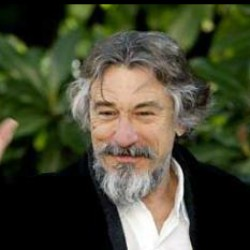

In [27]:
Image(human_files[652])

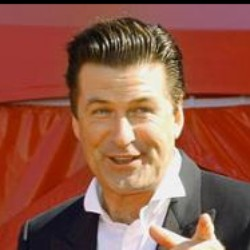

In [28]:
Image(human_files[641])

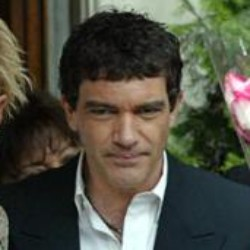

In [29]:
Image(human_files[922])

In [30]:
dog_detector(human_files[922])

True

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [31]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
#train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|███████████████████████████████████████| 836/836 [00:07<00:00, 111.11it/s]


In [32]:
# If I try to do the same with train_files, I get :
train_tensors = paths_to_tensor(train_files).astype('float32')/255

100%|██████████████████████████████████████| 6680/6680 [01:30<00:00, 73.74it/s]


MemoryError: 

OK, so: If I try to do the same with train_files, I get a Memory Error! Probably 4GB of RAM is not enough, so I'll need some way round this issue:

In [33]:
train_tensors = path_to_tensor(train_files[0])
for ind in range(1, 1000):
    train_tensors = np.append(train_tensors, path_to_tensor(train_files[ind]), axis = 0)
    
train_tensors.shape

(1000, 224, 224, 3)

In [34]:
for ind in range(1000, 2000):
    train_tensors = np.append(train_tensors, path_to_tensor(train_files[ind]), axis = 0)
    
train_tensors.shape

(2000, 224, 224, 3)

In [35]:
for ind in range(2000, 3000):
    train_tensors = np.append(train_tensors, path_to_tensor(train_files[ind]), axis = 0)
    
train_tensors.shape

MemoryError: 

In [36]:
train_tensors.shape

(2363, 224, 224, 3)

You see: again memory error! Probably I'll have to live with a smaller subset of the train_files. Still, in the next section I am going to get accuracy for the test set over 1%!

In [37]:
for ind in range(len(train_tensors)):
    train_tensors[ind] = train_tensors[ind].astype('float32')/255
    
train_tensors.shape

(2363, 224, 224, 3)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__ 

First, I need to extract the features, so I'll use a stack of three convolutional layers followed by max pooling layers and, finally, a dropout layer -to avoid over-fitting. Then flatten the tensor as a pre-processing step for the classifier which consists of a fully-connected ("dense") layer with 256 hidden nodes (plus 50% dropout, again, to avoid over-fitting) and the output layer with 133 outputs and softmax function. Normally such architecture works. Let's try and see.

In [38]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

In [39]:
# Architecture

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', kernel_initializer = 'truncated_normal',
                        input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=7))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer = 'truncated_normal'))
                        
model.add(MaxPooling2D(pool_size=4))

model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', kernel_initializer = 'truncated_normal'))
                        
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer = 'truncated_normal'))
model.add(Dropout(0.5))

model.add(Dense(133, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      4864      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         131328    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 256)         0         
__________

### Compile the Model

In [40]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [41]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 20

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

#model.fit(train_tensors, train_targets, 
#          validation_data=(valid_tensors, valid_targets),
#          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=2)

hist = model.fit(train_tensors, train_targets[:2363], batch_size=64, epochs=20,
          validation_data=(valid_tensors, valid_targets), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 2363 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 4.88161, saving model to saved_models/weights.best.from_scratch.hdf5
 - 147s - loss: 5.0070 - acc: 0.0102 - val_loss: 4.8816 - val_acc: 0.0144
Epoch 2/20
Epoch 00002: val_loss did not improve
 - 143s - loss: 4.8798 - acc: 0.0123 - val_loss: 4.8986 - val_acc: 0.0084
Epoch 3/20
Epoch 00003: val_loss improved from 4.88161 to 4.87473, saving model to saved_models/weights.best.from_scratch.hdf5
 - 143s - loss: 4.8797 - acc: 0.0118 - val_loss: 4.8747 - val_acc: 0.0084
Epoch 4/20
Epoch 00004: val_loss improved from 4.87473 to 4.86766, saving model to saved_models/weights.best.from_scratch.hdf5
 - 141s - loss: 4.8650 - acc: 0.0174 - val_loss: 4.8677 - val_acc: 0.0168
Epoch 5/20
Epoch 00005: val_loss improved from 4.86766 to 4.82738, saving model to saved_models/weights.best.from_scratch.hdf5
 - 140s - loss: 4.8345 - acc: 0.0195 - val_loss: 4.8274 - val_acc: 0.0299
Epoch 6/20
Epoch 00006: val_lo

### Load the Model with the Best Validation Loss

In [42]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [43]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 8.7321%


Fine, the test accuracy is 8.7% which is definitely better than pure guessing (then the expected accuracy should be below 1%). Of course, the result is pretty disappointing, but let's keep in mind that we had less than 20 samples of each breed on average. Can we do better? Let's try to "increase" the training set using augmentation.

In [44]:
# architecture:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', kernel_initializer = 'truncated_normal',
                        input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=3))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', kernel_initializer = 'truncated_normal'))
                        
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, padding='valid', activation='relu', kernel_initializer = 'truncated_normal'))
                        
model.add(MaxPooling2D(pool_size=3))

model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', kernel_initializer = 'truncated_normal'))
                        
model.add(MaxPooling2D(pool_size=3))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer = 'truncated_normal'))
model.add(Dropout(0.5))

model.add(Dense(133, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 74, 74, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 36, 36, 128)       32896     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)       131328    
__________

In [45]:
from keras.preprocessing.image import ImageDataGenerator

In [46]:
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, zoom_range=[0.8, 1.2], rotation_range=20,
                            horizontal_flip = True)

In [47]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [48]:
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

In [50]:
batch_size=64

hist = model.fit_generator(datagen.flow(train_tensors, train_targets[:2363], batch_size=batch_size), epochs=60,
          steps_per_epoch = train_tensors.shape[0]//batch_size,
          validation_data=(valid_tensors, valid_targets), callbacks=[checkpointer], 
          verbose=2)

Epoch 1/60
Epoch 00001: val_loss improved from inf to 4.88527, saving model to aug_model.weights.best.hdf5
 - 97s - loss: 4.8920 - acc: 0.0065 - val_loss: 4.8853 - val_acc: 0.0072
Epoch 2/60
Epoch 00002: val_loss improved from 4.88527 to 4.88020, saving model to aug_model.weights.best.hdf5
 - 96s - loss: 4.8813 - acc: 0.0109 - val_loss: 4.8802 - val_acc: 0.0108
Epoch 3/60
Epoch 00003: val_loss improved from 4.88020 to 4.87803, saving model to aug_model.weights.best.hdf5
 - 95s - loss: 4.8746 - acc: 0.0095 - val_loss: 4.8780 - val_acc: 0.0108
Epoch 4/60
Epoch 00004: val_loss improved from 4.87803 to 4.87764, saving model to aug_model.weights.best.hdf5
 - 94s - loss: 4.8726 - acc: 0.0100 - val_loss: 4.8776 - val_acc: 0.0108
Epoch 5/60
Epoch 00005: val_loss did not improve
 - 94s - loss: 4.8689 - acc: 0.0069 - val_loss: 4.8780 - val_acc: 0.0096
Epoch 6/60
Epoch 00006: val_loss improved from 4.87764 to 4.87614, saving model to aug_model.weights.best.hdf5
 - 95s - loss: 4.8636 - acc: 0.0130

Epoch 52/60
Epoch 00052: val_loss improved from 3.87862 to 3.85243, saving model to aug_model.weights.best.hdf5
 - 94s - loss: 3.5931 - acc: 0.1492 - val_loss: 3.8524 - val_acc: 0.1150
Epoch 53/60
Epoch 00053: val_loss did not improve
 - 98s - loss: 3.4913 - acc: 0.1576 - val_loss: 3.8993 - val_acc: 0.1210
Epoch 54/60
Epoch 00054: val_loss did not improve
 - 109s - loss: 3.5113 - acc: 0.1567 - val_loss: 3.8988 - val_acc: 0.1162
Epoch 55/60
Epoch 00055: val_loss did not improve
 - 96s - loss: 3.4387 - acc: 0.1623 - val_loss: 3.9540 - val_acc: 0.1138
Epoch 56/60
Epoch 00056: val_loss did not improve
 - 99s - loss: 3.4471 - acc: 0.1676 - val_loss: 3.9355 - val_acc: 0.1162
Epoch 57/60
Epoch 00057: val_loss did not improve
 - 98s - loss: 3.3938 - acc: 0.1667 - val_loss: 3.9562 - val_acc: 0.1257
Epoch 58/60
Epoch 00058: val_loss improved from 3.85243 to 3.84425, saving model to aug_model.weights.best.hdf5
 - 97s - loss: 3.3940 - acc: 0.1754 - val_loss: 3.8442 - val_acc: 0.1425
Epoch 59/60
Ep

In [52]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.hdf5')

# evaluate and print test accuracy
score = model.evaluate(test_tensors, test_targets, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.138755980861


OK, augmentation, as expected, improved the test acccuracy quite significantly - to well over 13%. This is still below the desired 60% threshold. So it's time to try transfer learning.

---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [53]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [54]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [55]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [56]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 11.56549, saving model to saved_models/weights.best.VGG16.hdf5
 - 3s - loss: 12.8115 - acc: 0.1114 - val_loss: 11.5655 - val_acc: 0.1737
Epoch 2/20
Epoch 00002: val_loss improved from 11.56549 to 10.58359, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 10.8023 - acc: 0.2428 - val_loss: 10.5836 - val_acc: 0.2515
Epoch 3/20
Epoch 00003: val_loss improved from 10.58359 to 10.27351, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 10.1085 - acc: 0.3156 - val_loss: 10.2735 - val_acc: 0.2946
Epoch 4/20
Epoch 00004: val_loss improved from 10.27351 to 10.19592, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 9.8961 - acc: 0.3488 - val_loss: 10.1959 - val_acc: 0.3174
Epoch 5/20
Epoch 00005: val_loss improved from 10.19592 to 10.00494, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 9.7844 - acc: 0.3617 - val_loss: 10.004

### Load the Model with the Best Validation Loss

In [57]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [58]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 40.3110%


OK. Very significant iprovement, still well below the desired 60% accuracy for the test set. Still, I know a couple of tricks. They can improve the accuracy.

First, weight initialization is an important part of the training process. I am not going to delve into the issue, but truncated normal seems appropriate here. Let's try!

In [59]:
VGG16_model = Sequential()


VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


In [61]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 7.87245, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 7.3451 - acc: 0.5093 - val_loss: 7.8724 - val_acc: 0.4263
Epoch 2/20
Epoch 00002: val_loss improved from 7.87245 to 7.73540, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 7.1037 - acc: 0.5314 - val_loss: 7.7354 - val_acc: 0.4263
Epoch 3/20
Epoch 00003: val_loss improved from 7.73540 to 7.63954, saving model to saved_models/weights.best.VGG16.hdf5
 - 1s - loss: 7.0062 - acc: 0.5460 - val_loss: 7.6395 - val_acc: 0.4383
Epoch 4/20
Epoch 00004: val_loss did not improve
 - 1s - loss: 6.9454 - acc: 0.5548 - val_loss: 7.6921 - val_acc: 0.4383
Epoch 5/20
Epoch 00005: val_loss improved from 7.63954 to 7.45997, saving model to saved_models/weights.best.VGG16.hdf5
 - 1s - loss: 6.7828 - acc: 0.5584 - val_loss: 7.4600 - val_acc: 0.4443
Epoch 6/20
Epoch 00006: val_loss improved from 7.45997 to 7.26577, s

In [62]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 49.0431%


Great! I get an improvement in accuracy of 9% with virtually no cost at all. Just don't forget to initialize the weights properly. Can we do better?

I assume the professionals extracted features in the best possible way, so I see no reason to try to play with convolutional layers. Instead, I can try to improve the classifier. First, let's add one more hidden fully-connected layer

In [63]:
VGG16_model = Sequential()


VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))

VGG16_model.add(Dense(256, activation='relu', kernel_initializer = 'truncated_normal'))
VGG16_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 133)               34181     
Total params: 165,509
Trainable params: 165,509
Non-trainable params: 0
_________________________________________________________________


In [64]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 1.29691, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 2.3664 - acc: 0.4545 - val_loss: 1.2969 - val_acc: 0.6347
Epoch 2/20
Epoch 00002: val_loss improved from 1.29691 to 1.06546, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 0.7934 - acc: 0.7615 - val_loss: 1.0655 - val_acc: 0.7138
Epoch 3/20
Epoch 00003: val_loss did not improve
 - 2s - loss: 0.4794 - acc: 0.8478 - val_loss: 1.1103 - val_acc: 0.7126
Epoch 4/20
Epoch 00004: val_loss did not improve
 - 2s - loss: 0.3232 - acc: 0.8978 - val_loss: 1.1124 - val_acc: 0.7317
Epoch 5/20
Epoch 00005: val_loss did not improve
 - 2s - loss: 0.2381 - acc: 0.9216 - val_loss: 1.1857 - val_acc: 0.7425
Epoch 6/20
Epoch 00006: val_loss did not improve
 - 2s - loss: 0.1783 - acc: 0.9421 - val_loss: 1.2891 - val_acc: 0.7545
Epoch 7/20
Epoch 00007: val_loss did not improve
 - 2s - loss: 0.1365 - acc: 0.9539 - val

In [65]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 71.6507%


Exactly! Very reasonable improvement. By the way already this pretty simple model exceeds the desired 60% threshold with a 11.65% margin... But can one more trick help - I mean dropout (to fight possible over-fitting)

In [66]:
# Can dropout help?

VGG16_model = Sequential()


VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))

VGG16_model.add(Dense(256, activation='relu', kernel_initializer = 'truncated_normal'))
VGG16_model.add(Dropout(0.2))

VGG16_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_4 ( (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 133)               34181     
Total params: 165,509
Trainable params: 165,509
Non-trainable params: 0
_________________________________________________________________


In [67]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 1.33939, saving model to saved_models/weights.best.VGG16.hdf5
 - 3s - loss: 2.8238 - acc: 0.3732 - val_loss: 1.3394 - val_acc: 0.6192
Epoch 2/20
Epoch 00002: val_loss improved from 1.33939 to 1.06933, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 1.1031 - acc: 0.6728 - val_loss: 1.0693 - val_acc: 0.6826
Epoch 3/20
Epoch 00003: val_loss improved from 1.06933 to 1.00034, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 0.7641 - acc: 0.7681 - val_loss: 1.0003 - val_acc: 0.7257
Epoch 4/20
Epoch 00004: val_loss did not improve
 - 2s - loss: 0.5917 - acc: 0.8202 - val_loss: 1.0286 - val_acc: 0.7341
Epoch 5/20
Epoch 00005: val_loss did not improve
 - 2s - loss: 0.4714 - acc: 0.8536 - val_loss: 1.0554 - val_acc: 0.7353
Epoch 6/20
Epoch 00006: val_loss did not improve
 - 2s - loss: 0.3957 - acc: 0.8705 - val_loss: 1.1047 - val_acc: 0.7461
Epoch 7/20
Epoch 0

In [68]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 73.9234%


Yes! Again improved test accuracy. Now -almost 74%. Can we do better with one more hidden "dense" layer? 

In [69]:
VGG16_model = Sequential()


VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))

VGG16_model.add(Dense(256, activation='relu', kernel_initializer = 'truncated_normal'))
VGG16_model.add(Dropout(0.2))

VGG16_model.add(Dense(128, activation='relu', kernel_initializer = 'truncated_normal'))
VGG16_model.add(Dropout(0.2))

VGG16_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 133)               17157     
Total params: 181,381
Trainable params: 181,381
Non-trainable params: 0
_________________________________________________________________


In [70]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 1.32765, saving model to saved_models/weights.best.VGG16.hdf5
 - 3s - loss: 3.0254 - acc: 0.2963 - val_loss: 1.3276 - val_acc: 0.6240
Epoch 2/20
Epoch 00002: val_loss improved from 1.32765 to 0.99005, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 1.3466 - acc: 0.6024 - val_loss: 0.9900 - val_acc: 0.6922
Epoch 3/20
Epoch 00003: val_loss improved from 0.99005 to 0.90902, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 1.0010 - acc: 0.6898 - val_loss: 0.9090 - val_acc: 0.7210
Epoch 4/20
Epoch 00004: val_loss improved from 0.90902 to 0.83177, saving model to saved_models/weights.best.VGG16.hdf5
 - 2s - loss: 0.8326 - acc: 0.7334 - val_loss: 0.8318 - val_acc: 0.7497
Epoch 5/20
Epoch 00005: val_loss did not improve
 - 2s - loss: 0.7045 - acc: 0.7749 - val_loss: 0.8586 - val_acc: 0.7449
Epoch 6/20
Epoch 00006: val_loss did not improve
 - 2s - loss: 0.611

In [71]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 74.8804%


Yes, a bit better. I could try to fine-tune the parameters ( the more layers, the more tuning parameters), but I think it's time to utilize the fruit of this effort. Let's try to predict a dog breed.

### Predict Dog Breed with the Model

In [72]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [73]:
# let's find out the breed name of the dog which face detector misclassified as if it had a human face:

VGG16_predict_breed(train_files[78])

'Icelandic_sheepdog'

In [74]:
# and the answer is:
train_files[78]

'dogImages/train\\084.Icelandic_sheepdog\\Icelandic_sheepdog_05705.jpg'

Yes! It is an Icelandic sheepdog!

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

Yesteray I did a lot. Now is the time for transfer learning, but first let's import what we need and load target data:

In [1]:
import numpy as np
import tensorflow as tf
tf.__version__

'1.1.0'

In [2]:
bottleneck_features = np.load('bottleneck_features/DogVGG19Data.npz')

In [3]:
train_VGG19 = bottleneck_features['train']
valid_VGG19 = bottleneck_features['valid']
test_VGG19 = bottleneck_features['test']

In [4]:
train_VGG19.shape

(6680, 7, 7, 512)

In [5]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

from keras.callbacks import ModelCheckpoint 

Using TensorFlow backend.


In [8]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [6]:
# Let's start from the simples possible architecture:
VGG19_model = Sequential()

VGG19_model.add(GlobalAveragePooling2D(input_shape=train_VGG19.shape[1:]))
VGG19_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

VGG19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile
VGG19_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG19.hdf5', 
                               verbose=1, save_best_only=True)

VGG19_model.fit(train_VGG19, train_targets, 
          validation_data=(valid_VGG19, valid_targets),
          epochs=50, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 8.97304, saving model to saved_models/weights.best.VGG19.hdf5
 - 2s - loss: 10.4552 - acc: 0.1639 - val_loss: 8.9730 - val_acc: 0.2790
Epoch 2/50
Epoch 00002: val_loss improved from 8.97304 to 8.49877, saving model to saved_models/weights.best.VGG19.hdf5
 - 1s - loss: 8.2566 - acc: 0.3763 - val_loss: 8.4988 - val_acc: 0.3449
Epoch 3/50
Epoch 00003: val_loss improved from 8.49877 to 8.12566, saving model to saved_models/weights.best.VGG19.hdf5
 - 1s - loss: 7.7575 - acc: 0.4413 - val_loss: 8.1257 - val_acc: 0.3844
Epoch 4/50
Epoch 00004: val_loss improved from 8.12566 to 8.08419, saving model to saved_models/weights.best.VGG19.hdf5
 - 1s - loss: 7.5572 - acc: 0.4816 - val_loss: 8.0842 - val_acc: 0.4000
Epoch 5/50
Epoch 00005: val_loss improved from 8.08419 to 8.01193, saving model to saved_models/weights.best.VGG19.hdf5
 - 1s - loss: 7.4679 - acc: 0.5039 - val_loss: 8.0119 - val_acc: 0.4

In [10]:
VGG19_model.load_weights('saved_models/weights.best.VGG19.hdf5')

# get index of predicted dog breed for each image in test set
VGG19_predictions = [np.argmax(VGG19_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG19]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG19_predictions)==np.argmax(test_targets, axis=1))/len(VGG19_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 55.1435%


Very good! VGG19 used more layers than VGG16 to extract features so it's reasonable to expect this model to give a better accuracy. Here I get 55% which is better than 49% which I got using VGG16. As with the previous model, I see no reason to try and apply convolutional layers - I hope the professionals extracted all feattures they could. Instead, let's try to improve the classifier. First, lets' add a fully connected layer:

In [11]:
# architecture
# Let's add drop-out
VGG19_model = Sequential()

VGG19_model.add(GlobalAveragePooling2D(input_shape=train_VGG19.shape[1:]))

VGG19_model.add(Dense(256, activation='relu', kernel_initializer = 'truncated_normal'))
VGG19_model.add(Dropout(0.2))

VGG19_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

VGG19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               34181     
Total params: 165,509
Trainable params: 165,509
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile
VGG19_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG19.hdf5', 
                               verbose=1, save_best_only=True)

VGG19_model.fit(train_VGG19, train_targets, 
          validation_data=(valid_VGG19, valid_targets),
          epochs=50, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 1.23218, saving model to saved_models/weights.best.VGG19.hdf5
 - 2s - loss: 2.7997 - acc: 0.3826 - val_loss: 1.2322 - val_acc: 0.6467
Epoch 2/50
Epoch 00002: val_loss improved from 1.23218 to 0.97251, saving model to saved_models/weights.best.VGG19.hdf5
 - 2s - loss: 1.0322 - acc: 0.6979 - val_loss: 0.9725 - val_acc: 0.7341
Epoch 3/50
Epoch 00003: val_loss did not improve
 - 2s - loss: 0.7025 - acc: 0.7858 - val_loss: 0.9823 - val_acc: 0.7293
Epoch 4/50
Epoch 00004: val_loss improved from 0.97251 to 0.94543, saving model to saved_models/weights.best.VGG19.hdf5
 - 2s - loss: 0.5522 - acc: 0.8293 - val_loss: 0.9454 - val_acc: 0.7377
Epoch 5/50
Epoch 00005: val_loss did not improve
 - 2s - loss: 0.4486 - acc: 0.8644 - val_loss: 1.0605 - val_acc: 0.7569
Epoch 6/50
Epoch 00006: val_loss improved from 0.94543 to 0.94452, saving model to saved_models/weights.best.VGG19.hdf5
 - 2s - loss: 0.384

In [13]:
VGG19_model.load_weights('saved_models/weights.best.VGG19.hdf5')

# get index of predicted dog breed for each image in test set
VGG19_predictions = [np.argmax(VGG19_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG19]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG19_predictions)==np.argmax(test_targets, axis=1))/len(VGG19_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 77.2727%


Excellent accuracy!

In [14]:
# Add one more dense layer
VGG19_model = Sequential()

VGG19_model.add(GlobalAveragePooling2D(input_shape=train_VGG19.shape[1:]))

VGG19_model.add(Dense(256, activation='relu', kernel_initializer = 'truncated_normal'))
VGG19_model.add(Dropout(0.2))

VGG19_model.add(Dense(128, activation='relu', kernel_initializer = 'truncated_normal'))
VGG19_model.add(Dropout(0.2))

VGG19_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

VGG19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 133)               17157     
Total params: 181,381
Trainable params: 181,381
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compile
VGG19_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG19.hdf5', 
                               verbose=1, save_best_only=True)

VGG19_model.fit(train_VGG19, train_targets, 
          validation_data=(valid_VGG19, valid_targets),
          epochs=50, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 1.27485, saving model to saved_models/weights.best.VGG19.hdf5
 - 2s - loss: 2.8484 - acc: 0.3232 - val_loss: 1.2748 - val_acc: 0.6216
Epoch 2/50
Epoch 00002: val_loss improved from 1.27485 to 0.97684, saving model to saved_models/weights.best.VGG19.hdf5
 - 2s - loss: 1.2985 - acc: 0.6171 - val_loss: 0.9768 - val_acc: 0.6814
Epoch 3/50
Epoch 00003: val_loss improved from 0.97684 to 0.86128, saving model to saved_models/weights.best.VGG19.hdf5
 - 2s - loss: 0.9350 - acc: 0.7159 - val_loss: 0.8613 - val_acc: 0.7317
Epoch 4/50
Epoch 00004: val_loss did not improve
 - 2s - loss: 0.7657 - acc: 0.7563 - val_loss: 0.9183 - val_acc: 0.7353
Epoch 5/50
Epoch 00005: val_loss improved from 0.86128 to 0.81443, saving model to saved_models/weights.best.VGG19.hdf5
 - 2s - loss: 0.6611 - acc: 0.7925 - val_loss: 0.8144 - val_acc: 0.7593
Epoch 6/50
Epoch 00006: val_loss did not improve
 - 2s - loss: 0.581

In [16]:
VGG19_model.load_weights('saved_models/weights.best.VGG19.hdf5')

# get index of predicted dog breed for each image in test set
VGG19_predictions = [np.argmax(VGG19_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG19]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG19_predictions)==np.argmax(test_targets, axis=1))/len(VGG19_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 74.5215%


OK. No improvement. Neural nets have significant amount of randomness. so the previous high accuracy (77%) might be due to chance. When I experimented with even more "dense" layers in the classifier, the accuracy remained in the 75% region. Probably, additional layers do not help (or I failed to fine tune the parameters properly) . I could play with the parameters and number of hidden layers trying to squeeze additional 1% of accuracy. Instead, I'll move to the next pre-trained model. I want to find a model which consistently produces even higher accuracy.

In [17]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('bottleneck_features/DogResnet50Data.npz')

In [18]:
train_RN50 = bottleneck_features['train']
valid_RN50 = bottleneck_features['valid']
test_RN50 = bottleneck_features['test']


train_RN50.shape

(6680, 1, 1, 2048)

Interesting! GlobalAveragePooling is already done.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   




In [19]:
### TODO: Define your architecture.
# As usual let's start from the simplest poossible architecture:

RN50_model = Sequential()

RN50_model.add(Flatten(input_shape=(1,1,2048)))

RN50_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

RN50_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [20]:
### TODO: Compile the model.
RN50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [21]:
### TODO: Train the model.
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.RN50.hdf5', 
                               verbose=1, save_best_only=True)

RN50_model.fit(train_RN50, train_targets, 
          validation_data=(valid_RN50, valid_targets),
          epochs=50, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 0.95867, saving model to saved_models/weights.best.RN50.hdf5
 - 1s - loss: 1.9543 - acc: 0.5337 - val_loss: 0.9587 - val_acc: 0.7198
Epoch 2/50
Epoch 00002: val_loss improved from 0.95867 to 0.82454, saving model to saved_models/weights.best.RN50.hdf5
 - 1s - loss: 0.5012 - acc: 0.8488 - val_loss: 0.8245 - val_acc: 0.7581
Epoch 3/50
Epoch 00003: val_loss improved from 0.82454 to 0.66904, saving model to saved_models/weights.best.RN50.hdf5
 - 1s - loss: 0.2842 - acc: 0.9097 - val_loss: 0.6690 - val_acc: 0.8024
Epoch 4/50
Epoch 00004: val_loss did not improve
 - 1s - loss: 0.1793 - acc: 0.9493 - val_loss: 0.6930 - val_acc: 0.8012
Epoch 5/50
Epoch 00005: val_loss improved from 0.66904 to 0.66245, saving model to saved_models/weights.best.RN50.hdf5
 - 1s - loss: 0.1225 - acc: 0.9653 - val_loss: 0.6625 - val_acc: 0.8192
Epoch 6/50
Epoch 00006: val_loss did not improve
 - 1s - loss: 0.0815 - 

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [22]:
### TODO: Load the model weights with the best validation loss.
RN50_model.load_weights('saved_models/weights.best.RN50.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [23]:
### TODO: Calculate classification accuracy on the test dataset.
# get index of predicted dog breed for each image in test set
RN50_predictions = [np.argmax(RN50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_RN50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(RN50_predictions)==np.argmax(test_targets, axis=1))/len(RN50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 81.2201%


Is 81.22% greater than 60%?

Definitely - yes! I am absolutely amazed. A two line model gives over 80% accuracy! And it works blazingly fast...

Interestingly, adding fully connected layers in the classifier didn't produce accuracy over 80% - until I exercised one more trick: leaky ReLU!

In [25]:
from keras.layers import LeakyReLU

# Archotecture using leaky ReLU
RN50_model = Sequential()

RN50_model.add(Flatten(input_shape=(1,1,2048)))

RN50_model.add(Dense(256, kernel_initializer = 'truncated_normal', activation='linear'))
RN50_model.add(LeakyReLU(alpha = 0.03))
RN50_model.add(Dropout(0.2))

RN50_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

RN50_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [26]:
RN50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.RN501.hdf5', 
                               verbose=1, save_best_only=True)

RN50_model.fit(train_RN50, train_targets, 
          validation_data=(valid_RN50, valid_targets),
          epochs=50, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 0.95405, saving model to saved_models/weights.best.RN501.hdf5
 - 2s - loss: 2.0691 - acc: 0.4963 - val_loss: 0.9541 - val_acc: 0.7042
Epoch 2/50
Epoch 00002: val_loss improved from 0.95405 to 0.73623, saving model to saved_models/weights.best.RN501.hdf5
 - 2s - loss: 0.6960 - acc: 0.7795 - val_loss: 0.7362 - val_acc: 0.7701
Epoch 3/50
Epoch 00003: val_loss did not improve
 - 2s - loss: 0.4304 - acc: 0.8578 - val_loss: 0.7492 - val_acc: 0.7808
Epoch 4/50
Epoch 00004: val_loss improved from 0.73623 to 0.67167, saving model to saved_models/weights.best.RN501.hdf5
 - 2s - loss: 0.3214 - acc: 0.8933 - val_loss: 0.6717 - val_acc: 0.8060
Epoch 5/50
Epoch 00005: val_loss did not improve
 - 2s - loss: 0.2323 - acc: 0.9219 - val_loss: 0.6916 - val_acc: 0.8024
Epoch 6/50
Epoch 00006: val_loss did not improve
 - 2s - loss: 0.1895 - acc: 0.9364 - val_loss: 0.6973 - val_acc: 0.8156
Epoch 7/50
Epoch 0

In [27]:
RN50_model.load_weights('saved_models/weights.best.RN501.hdf5')

# get index of predicted dog breed for each image in test set
RN50_predictions = [np.argmax(RN50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_RN50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(RN50_predictions)==np.argmax(test_targets, axis=1))/len(RN50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 81.5789%


The leaky ReLU has its own tuning parameter - alpha (slope of the linear function for the positive arguments) - we can try to fit it:

In [28]:
# Archotecture 
RN50_model = Sequential()

RN50_model.add(Flatten(input_shape=(1,1,2048)))

RN50_model.add(Dense(256, kernel_initializer = 'truncated_normal', activation='linear'))
RN50_model.add(LeakyReLU(alpha = 0.04))
RN50_model.add(Dropout(0.2))

RN50_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

RN50_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [29]:
RN50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.RN502.hdf5', 
                               verbose=1, save_best_only=True)

RN50_model.fit(train_RN50, train_targets, 
          validation_data=(valid_RN50, valid_targets),
          epochs=50, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 0.90659, saving model to saved_models/weights.best.RN502.hdf5
 - 2s - loss: 2.0655 - acc: 0.4960 - val_loss: 0.9066 - val_acc: 0.7222
Epoch 2/50
Epoch 00002: val_loss improved from 0.90659 to 0.68404, saving model to saved_models/weights.best.RN502.hdf5
 - 2s - loss: 0.6848 - acc: 0.7853 - val_loss: 0.6840 - val_acc: 0.7832
Epoch 3/50
Epoch 00003: val_loss did not improve
 - 2s - loss: 0.4456 - acc: 0.8581 - val_loss: 0.7426 - val_acc: 0.7713
Epoch 4/50
Epoch 00004: val_loss did not improve
 - 2s - loss: 0.3075 - acc: 0.8943 - val_loss: 0.7323 - val_acc: 0.7808
Epoch 5/50
Epoch 00005: val_loss did not improve
 - 2s - loss: 0.2425 - acc: 0.9184 - val_loss: 0.7364 - val_acc: 0.8060
Epoch 6/50
Epoch 00006: val_loss did not improve
 - 2s - loss: 0.1681 - acc: 0.9430 - val_loss: 0.7754 - val_acc: 0.8000
Epoch 7/50
Epoch 00007: val_loss did not improve
 - 2s - loss: 0.1377 - acc: 0.9552 - val

In [30]:
RN50_model.load_weights('saved_models/weights.best.RN502.hdf5')

# get index of predicted dog breed for each image in test set
RN50_predictions = [np.argmax(RN50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_RN50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(RN50_predictions)==np.argmax(test_targets, axis=1))/len(RN50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 78.7081%


In [31]:
# Architecture 
RN50_model = Sequential()

RN50_model.add(Flatten(input_shape=(1,1,2048)))

RN50_model.add(Dense(256, kernel_initializer = 'truncated_normal', activation='linear'))
RN50_model.add(LeakyReLU(alpha = 0.05))
RN50_model.add(Dropout(0.2))

RN50_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

RN50_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [32]:
RN50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.RN503.hdf5', 
                               verbose=1, save_best_only=True)

RN50_model.fit(train_RN50, train_targets, 
          validation_data=(valid_RN50, valid_targets),
          epochs=50, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 0.99227, saving model to saved_models/weights.best.RN503.hdf5
 - 2s - loss: 2.0183 - acc: 0.5087 - val_loss: 0.9923 - val_acc: 0.6874
Epoch 2/50
Epoch 00002: val_loss improved from 0.99227 to 0.74526, saving model to saved_models/weights.best.RN503.hdf5
 - 2s - loss: 0.6697 - acc: 0.7900 - val_loss: 0.7453 - val_acc: 0.7557
Epoch 3/50
Epoch 00003: val_loss improved from 0.74526 to 0.71328, saving model to saved_models/weights.best.RN503.hdf5
 - 2s - loss: 0.4306 - acc: 0.8575 - val_loss: 0.7133 - val_acc: 0.7820
Epoch 4/50
Epoch 00004: val_loss improved from 0.71328 to 0.66644, saving model to saved_models/weights.best.RN503.hdf5
 - 2s - loss: 0.3116 - acc: 0.8945 - val_loss: 0.6664 - val_acc: 0.8048
Epoch 5/50
Epoch 00005: val_loss did not improve
 - 2s - loss: 0.2317 - acc: 0.9253 - val_loss: 0.7928 - val_acc: 0.7737
Epoch 6/50
Epoch 00006: val_loss did not improve
 - 2s - loss: 0.178

In [33]:
RN50_model.load_weights('saved_models/weights.best.RN503.hdf5')

# get index of predicted dog breed for each image in test set
RN50_predictions = [np.argmax(RN50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_RN50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(RN50_predictions)==np.argmax(test_targets, axis=1))/len(RN50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 79.3062%


In [34]:
# Architecture 
RN50_model = Sequential()

RN50_model.add(Flatten(input_shape=(1,1,2048)))

RN50_model.add(Dense(256, kernel_initializer = 'truncated_normal', activation='linear'))
RN50_model.add(LeakyReLU(alpha = 0.02))
RN50_model.add(Dropout(0.2))

RN50_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

RN50_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [35]:
RN50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.RN504.hdf5', 
                               verbose=1, save_best_only=True)

RN50_model.fit(train_RN50, train_targets, 
          validation_data=(valid_RN50, valid_targets),
          epochs=50, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 0.93010, saving model to saved_models/weights.best.RN504.hdf5
 - 2s - loss: 2.1337 - acc: 0.4856 - val_loss: 0.9301 - val_acc: 0.7186
Epoch 2/50
Epoch 00002: val_loss improved from 0.93010 to 0.77334, saving model to saved_models/weights.best.RN504.hdf5
 - 2s - loss: 0.7059 - acc: 0.7813 - val_loss: 0.7733 - val_acc: 0.7760
Epoch 3/50
Epoch 00003: val_loss improved from 0.77334 to 0.68479, saving model to saved_models/weights.best.RN504.hdf5
 - 2s - loss: 0.4520 - acc: 0.8527 - val_loss: 0.6848 - val_acc: 0.7808
Epoch 4/50
Epoch 00004: val_loss did not improve
 - 2s - loss: 0.3258 - acc: 0.8925 - val_loss: 0.7002 - val_acc: 0.8012
Epoch 5/50
Epoch 00005: val_loss improved from 0.68479 to 0.64491, saving model to saved_models/weights.best.RN504.hdf5
 - 2s - loss: 0.2450 - acc: 0.9172 - val_loss: 0.6449 - val_acc: 0.8156
Epoch 6/50
Epoch 00006: val_loss did not improve
 - 2s - loss: 0.182

In [36]:
RN50_model.load_weights('saved_models/weights.best.RN504.hdf5')

# get index of predicted dog breed for each image in test set
RN50_predictions = [np.argmax(RN50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_RN50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(RN50_predictions)==np.argmax(test_targets, axis=1))/len(RN50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 80.0239%


OK. No improvement, but 81.58% of test accuracy was pretty good. Can adding one more fully-connected layer to the classifier improve the accuracy? Let's try and see:

In [37]:
# Architecture 
RN50_model = Sequential()

RN50_model.add(Flatten(input_shape=(1,1,2048)))

RN50_model.add(Dense(256, kernel_initializer = 'truncated_normal', activation='linear'))
RN50_model.add(LeakyReLU(alpha = 0.03))
RN50_model.add(Dropout(0.2))

RN50_model.add(Dense(128, kernel_initializer = 'truncated_normal', activation='linear'))
RN50_model.add(LeakyReLU(alpha = 0.03))
RN50_model.add(Dropout(0.2))


RN50_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

RN50_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
__________

In [38]:
RN50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.RN505.hdf5', 
                               verbose=1, save_best_only=True)

RN50_model.fit(train_RN50, train_targets, 
          validation_data=(valid_RN50, valid_targets),
          epochs=50, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 1.15889, saving model to saved_models/weights.best.RN505.hdf5
 - 3s - loss: 2.6896 - acc: 0.3624 - val_loss: 1.1589 - val_acc: 0.6455
Epoch 2/50
Epoch 00002: val_loss improved from 1.15889 to 0.79394, saving model to saved_models/weights.best.RN505.hdf5
 - 2s - loss: 1.0632 - acc: 0.6781 - val_loss: 0.7939 - val_acc: 0.7521
Epoch 3/50
Epoch 00003: val_loss improved from 0.79394 to 0.74700, saving model to saved_models/weights.best.RN505.hdf5
 - 2s - loss: 0.7728 - acc: 0.7524 - val_loss: 0.7470 - val_acc: 0.7437
Epoch 4/50
Epoch 00004: val_loss improved from 0.74700 to 0.69733, saving model to saved_models/weights.best.RN505.hdf5
 - 2s - loss: 0.5798 - acc: 0.8063 - val_loss: 0.6973 - val_acc: 0.7868
Epoch 5/50
Epoch 00005: val_loss improved from 0.69733 to 0.68349, saving model to saved_models/weights.best.RN505.hdf5
 - 2s - loss: 0.4673 - acc: 0.8460 - val_loss: 0.6835 - val_acc: 0.78

In [39]:
RN50_model.load_weights('saved_models/weights.best.RN505.hdf5')

# get index of predicted dog breed for each image in test set
RN50_predictions = [np.argmax(RN50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_RN50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(RN50_predictions)==np.argmax(test_targets, axis=1))/len(RN50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 81.1005%


OK. No spectacular improvement. Of course, I can spend my time trying to squeeze additional 1% of accuracy, instead I'll investigate the two remaining transfer-ready models.

In [40]:
bottleneck_features = np.load('bottleneck_features/DogInceptionV3Data.npz')

train_V3 = bottleneck_features['train']
valid_V3 = bottleneck_features['valid']
test_V3 = bottleneck_features['test']

train_V3.shape

(6680, 5, 5, 2048)

In [41]:
# First, the simplest possible architecture

V3_model = Sequential()

V3_model.add(GlobalAveragePooling2D(input_shape=(5, 5, 2048)))

V3_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

V3_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [42]:
V3_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.V3.hdf5', 
                               verbose=1, save_best_only=True)

V3_model.fit(train_V3, train_targets, 
          validation_data=(valid_V3, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 0.69833, saving model to saved_models/weights.best.V3.hdf5
 - 3s - loss: 1.3255 - acc: 0.6735 - val_loss: 0.6983 - val_acc: 0.7988
Epoch 2/20
Epoch 00002: val_loss improved from 0.69833 to 0.61820, saving model to saved_models/weights.best.V3.hdf5
 - 3s - loss: 0.4781 - acc: 0.8510 - val_loss: 0.6182 - val_acc: 0.8180
Epoch 3/20
Epoch 00003: val_loss did not improve
 - 3s - loss: 0.3434 - acc: 0.8951 - val_loss: 0.6773 - val_acc: 0.8311
Epoch 4/20
Epoch 00004: val_loss did not improve
 - 3s - loss: 0.2653 - acc: 0.9141 - val_loss: 0.6626 - val_acc: 0.8359
Epoch 5/20
Epoch 00005: val_loss did not improve
 - 3s - loss: 0.2099 - acc: 0.9322 - val_loss: 0.6448 - val_acc: 0.8443
Epoch 6/20
Epoch 00006: val_loss did not improve
 - 3s - loss: 0.1697 - acc: 0.9433 - val_loss: 0.6509 - val_acc: 0.8479
Epoch 7/20
Epoch 00007: val_loss did not improve
 - 3s - loss: 0.1380 - acc: 0.9534 - val_loss:

In [43]:
V3_model.load_weights('saved_models/weights.best.V3.hdf5')

# get index of predicted dog breed for each image in test set
V3_predictions = [np.argmax(V3_model.predict(np.expand_dims(feature, axis=0))) for feature in test_V3]

# report test accuracy
test_accuracy = 100*np.sum(np.array(V3_predictions)==np.argmax(test_targets, axis=1))/len(V3_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 78.7081%


Good but not exceptional. Let's move directly to better a model (I skip the boring part of finding the right architecture and tuning the parameters):

In [44]:
V3_model = Sequential()

V3_model.add(GlobalAveragePooling2D(input_shape=(5, 5, 2048)))

V3_model.add(Dense(256, activation='linear', kernel_initializer = 'truncated_normal'))
V3_model.add(LeakyReLU(alpha = 0.04))
V3_model.add(Dropout(0.5))

V3_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

V3_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_5 ( (None, 2048)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [45]:
V3_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.V31.hdf5', 
                               verbose=1, save_best_only=True)

V3_model.fit(train_V3, train_targets, 
          validation_data=(valid_V3, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 0.69205, saving model to saved_models/weights.best.V31.hdf5
 - 4s - loss: 1.9631 - acc: 0.5481 - val_loss: 0.6921 - val_acc: 0.7808
Epoch 2/20
Epoch 00002: val_loss improved from 0.69205 to 0.62635, saving model to saved_models/weights.best.V31.hdf5
 - 3s - loss: 0.8592 - acc: 0.7528 - val_loss: 0.6264 - val_acc: 0.8132
Epoch 3/20
Epoch 00003: val_loss improved from 0.62635 to 0.57148, saving model to saved_models/weights.best.V31.hdf5
 - 3s - loss: 0.6823 - acc: 0.7982 - val_loss: 0.5715 - val_acc: 0.8240
Epoch 4/20
Epoch 00004: val_loss did not improve
 - 3s - loss: 0.6006 - acc: 0.8202 - val_loss: 0.5881 - val_acc: 0.8371
Epoch 5/20
Epoch 00005: val_loss improved from 0.57148 to 0.55043, saving model to saved_models/weights.best.V31.hdf5
 - 3s - loss: 0.5529 - acc: 0.8355 - val_loss: 0.5504 - val_acc: 0.8503
Epoch 6/20
Epoch 00006: val_loss did not improve
 - 3s - loss: 0.4903 - acc:

In [46]:
V3_model.load_weights('saved_models/weights.best.V31.hdf5')

# get index of predicted dog breed for each image in test set
V3_predictions = [np.argmax(V3_model.predict(np.expand_dims(feature, axis=0))) for feature in test_V3]

# report test accuracy
test_accuracy = 100*np.sum(np.array(V3_predictions)==np.argmax(test_targets, axis=1))/len(V3_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 81.8182%


Definitely better but not very much to boast about. Let's move on!

Ooooops! the system collapsed, probably the files are too large for my laptop. So I need to import and load everything I'll need. (It's very nice that all the previous work is saved in "saved_models/...." files.

In [1]:
import numpy as np
import tensorflow as tf
tf.__version__

'1.1.0'

In [2]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [3]:
bottleneck_features = np.load('bottleneck_features/DogXceptionData.npz')

train_X = bottleneck_features['train']
valid_X = bottleneck_features['valid']
test_X = bottleneck_features['test']

train_X.shape

(6680, 7, 7, 2048)

In [4]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

from keras.callbacks import ModelCheckpoint 

In [5]:
# As usual, start with the simplest possible architecture

X_model = Sequential()

X_model.add(GlobalAveragePooling2D(input_shape=(7, 7, 2048)))

X_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

X_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [6]:
# compile and train the model
X_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.X.hdf5', 
                               verbose=1, save_best_only=True)

X_model.fit(train_X, train_targets, 
          validation_data=(valid_X, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 0.54370, saving model to saved_models/weights.best.X.hdf5
 - 5s - loss: 1.1670 - acc: 0.7240 - val_loss: 0.5437 - val_acc: 0.8228
Epoch 2/20
Epoch 00002: val_loss improved from 0.54370 to 0.49736, saving model to saved_models/weights.best.X.hdf5
 - 4s - loss: 0.3973 - acc: 0.8804 - val_loss: 0.4974 - val_acc: 0.8383
Epoch 3/20
Epoch 00003: val_loss improved from 0.49736 to 0.47776, saving model to saved_models/weights.best.X.hdf5
 - 4s - loss: 0.3092 - acc: 0.9031 - val_loss: 0.4778 - val_acc: 0.8491
Epoch 4/20
Epoch 00004: val_loss did not improve
 - 4s - loss: 0.2557 - acc: 0.9198 - val_loss: 0.4986 - val_acc: 0.8515
Epoch 5/20
Epoch 00005: val_loss did not improve
 - 4s - loss: 0.2143 - acc: 0.9326 - val_loss: 0.5043 - val_acc: 0.8431
Epoch 6/20
Epoch 00006: val_loss did not improve
 - 4s - loss: 0.1856 - acc: 0.9419 - val_loss: 0.4940 - val_acc: 0.8587
Epoch 7/20
Epoch 00007: val_lo

In [7]:
X_model.load_weights('saved_models/weights.best.X.hdf5')

# get index of predicted dog breed for each image in test set
X_predictions = [np.argmax(X_model.predict(np.expand_dims(feature, axis=0))) for feature in test_X]

# report test accuracy
test_accuracy = 100*np.sum(np.array(X_predictions)==np.argmax(test_targets, axis=1))/len(X_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 83.8517%


The best accuracy so far... But can we do better?

In [9]:
from keras.layers import LeakyReLU

# Arcitecture:
X_model = Sequential()

X_model.add(GlobalAveragePooling2D(input_shape=(7, 7, 2048)))

X_model.add(Dense(256, activation='linear', kernel_initializer = 'truncated_normal'))
X_model.add(LeakyReLU(alpha = 0.15))
X_model.add(Dropout(0.5))


X_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

X_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compile and train the model
X_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.X.hdf5', 
                               verbose=1, save_best_only=True)

X_model.fit(train_X, train_targets, 
          validation_data=(valid_X, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 0.60817, saving model to saved_models/weights.best.X.hdf5
 - 6s - loss: 1.7774 - acc: 0.5918 - val_loss: 0.6082 - val_acc: 0.8132
Epoch 2/20
Epoch 00002: val_loss improved from 0.60817 to 0.53327, saving model to saved_models/weights.best.X.hdf5
 - 5s - loss: 0.7073 - acc: 0.7901 - val_loss: 0.5333 - val_acc: 0.8407
Epoch 3/20
Epoch 00003: val_loss improved from 0.53327 to 0.52216, saving model to saved_models/weights.best.X.hdf5
 - 5s - loss: 0.5475 - acc: 0.8266 - val_loss: 0.5222 - val_acc: 0.8323
Epoch 4/20
Epoch 00004: val_loss improved from 0.52216 to 0.42810, saving model to saved_models/weights.best.X.hdf5
 - 5s - loss: 0.4654 - acc: 0.8534 - val_loss: 0.4281 - val_acc: 0.8527
Epoch 5/20
Epoch 00005: val_loss did not improve
 - 5s - loss: 0.4100 - acc: 0.8728 - val_loss: 0.4662 - val_acc: 0.8491
Epoch 6/20
Epoch 00006: val_loss did not improve
 - 5s - loss: 0.3677 - acc: 0.8789 

In [11]:
X_model.load_weights('saved_models/weights.best.X.hdf5')

# get index of predicted dog breed for each image in test set
X_predictions = [np.argmax(X_model.predict(np.expand_dims(feature, axis=0))) for feature in test_X]

# report test accuracy
test_accuracy = 100*np.sum(np.array(X_predictions)==np.argmax(test_targets, axis=1))/len(X_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 83.6124%


Let's fine-tune alpha in leaky ReLU

In [12]:
from keras.layers import LeakyReLU

# Arcitecture:
X_model = Sequential()

X_model.add(GlobalAveragePooling2D(input_shape=(7, 7, 2048)))

X_model.add(Dense(256, activation='linear', kernel_initializer = 'truncated_normal'))
X_model.add(LeakyReLU(alpha = 0.1))
X_model.add(Dropout(0.5))


X_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

X_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile and train the model
X_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.X1.hdf5', 
                               verbose=1, save_best_only=True)

X_model.fit(train_X, train_targets, 
          validation_data=(valid_X, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 0.63456, saving model to saved_models/weights.best.X1.hdf5
 - 5s - loss: 1.7844 - acc: 0.5838 - val_loss: 0.6346 - val_acc: 0.7784
Epoch 2/20
Epoch 00002: val_loss improved from 0.63456 to 0.53294, saving model to saved_models/weights.best.X1.hdf5
 - 5s - loss: 0.7161 - acc: 0.7864 - val_loss: 0.5329 - val_acc: 0.8216
Epoch 3/20
Epoch 00003: val_loss improved from 0.53294 to 0.48456, saving model to saved_models/weights.best.X1.hdf5
 - 5s - loss: 0.5611 - acc: 0.8223 - val_loss: 0.4846 - val_acc: 0.8455
Epoch 4/20
Epoch 00004: val_loss did not improve
 - 5s - loss: 0.4692 - acc: 0.8524 - val_loss: 0.4896 - val_acc: 0.8527
Epoch 5/20
Epoch 00005: val_loss did not improve
 - 5s - loss: 0.4071 - acc: 0.8698 - val_loss: 0.5077 - val_acc: 0.8455
Epoch 6/20
Epoch 00006: val_loss improved from 0.48456 to 0.47922, saving model to saved_models/weights.best.X1.hdf5
 - 5s - loss: 0.3740 - acc: 0.8

In [14]:
X_model.load_weights('saved_models/weights.best.X1.hdf5')

# get index of predicted dog breed for each image in test set
X_predictions = [np.argmax(X_model.predict(np.expand_dims(feature, axis=0))) for feature in test_X]

# report test accuracy
test_accuracy = 100*np.sum(np.array(X_predictions)==np.argmax(test_targets, axis=1))/len(X_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 84.4498%


In [15]:
# Arcitecture:
X_model = Sequential()

X_model.add(GlobalAveragePooling2D(input_shape=(7, 7, 2048)))

X_model.add(Dense(256, activation='linear', kernel_initializer = 'truncated_normal'))
X_model.add(LeakyReLU(alpha = 0.2))
X_model.add(Dropout(0.5))


X_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

X_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_5 ( (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile and train the model
X_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.X2.hdf5', 
                               verbose=1, save_best_only=True)

X_model.fit(train_X, train_targets, 
          validation_data=(valid_X, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 0.63924, saving model to saved_models/weights.best.X2.hdf5
 - 6s - loss: 1.7421 - acc: 0.6012 - val_loss: 0.6392 - val_acc: 0.7964
Epoch 2/20
Epoch 00002: val_loss improved from 0.63924 to 0.56747, saving model to saved_models/weights.best.X2.hdf5
 - 5s - loss: 0.7094 - acc: 0.7877 - val_loss: 0.5675 - val_acc: 0.8204
Epoch 3/20
Epoch 00003: val_loss improved from 0.56747 to 0.51334, saving model to saved_models/weights.best.X2.hdf5
 - 5s - loss: 0.5400 - acc: 0.8326 - val_loss: 0.5133 - val_acc: 0.8407
Epoch 4/20
Epoch 00004: val_loss improved from 0.51334 to 0.47835, saving model to saved_models/weights.best.X2.hdf5
 - 5s - loss: 0.4782 - acc: 0.8516 - val_loss: 0.4784 - val_acc: 0.8455
Epoch 5/20
Epoch 00005: val_loss did not improve
 - 5s - loss: 0.4279 - acc: 0.8662 - val_loss: 0.4970 - val_acc: 0.8287
Epoch 6/20
Epoch 00006: val_loss did not improve
 - 5s - loss: 0.3723 - acc: 0.8

In [17]:
X_model.load_weights('saved_models/weights.best.X2.hdf5')

# get index of predicted dog breed for each image in test set
X_predictions = [np.argmax(X_model.predict(np.expand_dims(feature, axis=0))) for feature in test_X]

# report test accuracy
test_accuracy = 100*np.sum(np.array(X_predictions)==np.argmax(test_targets, axis=1))/len(X_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 85.1675%


In [18]:
# Arcitecture:
X_model = Sequential()

X_model.add(GlobalAveragePooling2D(input_shape=(7, 7, 2048)))

X_model.add(Dense(256, activation='linear', kernel_initializer = 'truncated_normal'))
X_model.add(LeakyReLU(alpha = 0.3))
X_model.add(Dropout(0.5))


X_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

X_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_6 ( (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [19]:
# compile and train the model
X_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.X3.hdf5', 
                               verbose=1, save_best_only=True)

X_model.fit(train_X, train_targets, 
          validation_data=(valid_X, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 0.62000, saving model to saved_models/weights.best.X3.hdf5
 - 5s - loss: 1.7545 - acc: 0.6048 - val_loss: 0.6200 - val_acc: 0.8108
Epoch 2/20
Epoch 00002: val_loss improved from 0.62000 to 0.53943, saving model to saved_models/weights.best.X3.hdf5
 - 5s - loss: 0.6922 - acc: 0.7945 - val_loss: 0.5394 - val_acc: 0.8228
Epoch 3/20
Epoch 00003: val_loss improved from 0.53943 to 0.52632, saving model to saved_models/weights.best.X3.hdf5
 - 5s - loss: 0.5480 - acc: 0.8364 - val_loss: 0.5263 - val_acc: 0.8216
Epoch 4/20
Epoch 00004: val_loss improved from 0.52632 to 0.51131, saving model to saved_models/weights.best.X3.hdf5
 - 5s - loss: 0.4780 - acc: 0.8561 - val_loss: 0.5113 - val_acc: 0.8335
Epoch 5/20
Epoch 00005: val_loss improved from 0.51131 to 0.49152, saving model to saved_models/weights.best.X3.hdf5
 - 5s - loss: 0.4112 - acc: 0.8714 - val_loss: 0.4915 - val_acc: 0.8407
Epoch 6/20
E

In [21]:
X_model.load_weights('saved_models/weights.best.X3.hdf5')

# get index of predicted dog breed for each image in test set
X_predictions = [np.argmax(X_model.predict(np.expand_dims(feature, axis=0))) for feature in test_X]

# report test accuracy
test_accuracy = 100*np.sum(np.array(X_predictions)==np.argmax(test_targets, axis=1))/len(X_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 84.2105%


In [22]:
# Arcitecture:
X_model = Sequential()

X_model.add(GlobalAveragePooling2D(input_shape=(7, 7, 2048)))

X_model.add(Dense(256, activation='linear', kernel_initializer = 'truncated_normal'))
X_model.add(LeakyReLU(alpha = 0.4))
X_model.add(Dropout(0.5))


X_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

X_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_7 ( (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [23]:
# compile and train the model
X_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.X4.hdf5', 
                               verbose=1, save_best_only=True)

X_model.fit(train_X, train_targets, 
          validation_data=(valid_X, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 0.62169, saving model to saved_models/weights.best.X4.hdf5
 - 6s - loss: 1.7088 - acc: 0.6096 - val_loss: 0.6217 - val_acc: 0.8096
Epoch 2/20
Epoch 00002: val_loss improved from 0.62169 to 0.52938, saving model to saved_models/weights.best.X4.hdf5
 - 5s - loss: 0.6858 - acc: 0.7999 - val_loss: 0.5294 - val_acc: 0.8347
Epoch 3/20
Epoch 00003: val_loss improved from 0.52938 to 0.49951, saving model to saved_models/weights.best.X4.hdf5
 - 5s - loss: 0.5522 - acc: 0.8326 - val_loss: 0.4995 - val_acc: 0.8251
Epoch 4/20
Epoch 00004: val_loss did not improve
 - 5s - loss: 0.4665 - acc: 0.8527 - val_loss: 0.5249 - val_acc: 0.8228
Epoch 5/20
Epoch 00005: val_loss did not improve
 - 5s - loss: 0.4154 - acc: 0.8693 - val_loss: 0.5077 - val_acc: 0.8407
Epoch 6/20
Epoch 00006: val_loss did not improve
 - 5s - loss: 0.3633 - acc: 0.8876 - val_loss: 0.5096 - val_acc: 0.8383
Epoch 7/20
Epoch 00007: val

In [24]:
X_model.load_weights('saved_models/weights.best.X4.hdf5')

# get index of predicted dog breed for each image in test set
X_predictions = [np.argmax(X_model.predict(np.expand_dims(feature, axis=0))) for feature in test_X]

# report test accuracy
test_accuracy = 100*np.sum(np.array(X_predictions)==np.argmax(test_targets, axis=1))/len(X_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 84.2105%


In [25]:
# Arcitecture:
X_model = Sequential()

X_model.add(GlobalAveragePooling2D(input_shape=(7, 7, 2048)))

X_model.add(Dense(256, activation='linear', kernel_initializer = 'truncated_normal'))
X_model.add(LeakyReLU(alpha = 0.5))
X_model.add(Dropout(0.5))


X_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

X_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_8 ( (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [26]:
# compile and train the model
X_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.X5.hdf5', 
                               verbose=1, save_best_only=True)

X_model.fit(train_X, train_targets, 
          validation_data=(valid_X, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 0.64588, saving model to saved_models/weights.best.X5.hdf5
 - 6s - loss: 1.6722 - acc: 0.6148 - val_loss: 0.6459 - val_acc: 0.7976
Epoch 2/20
Epoch 00002: val_loss improved from 0.64588 to 0.56331, saving model to saved_models/weights.best.X5.hdf5
 - 5s - loss: 0.6845 - acc: 0.7889 - val_loss: 0.5633 - val_acc: 0.8192
Epoch 3/20
Epoch 00003: val_loss improved from 0.56331 to 0.52127, saving model to saved_models/weights.best.X5.hdf5
 - 5s - loss: 0.5479 - acc: 0.8388 - val_loss: 0.5213 - val_acc: 0.8371
Epoch 4/20
Epoch 00004: val_loss improved from 0.52127 to 0.50313, saving model to saved_models/weights.best.X5.hdf5
 - 5s - loss: 0.4552 - acc: 0.8581 - val_loss: 0.5031 - val_acc: 0.8455
Epoch 5/20
Epoch 00005: val_loss did not improve
 - 5s - loss: 0.4184 - acc: 0.8787 - val_loss: 0.5343 - val_acc: 0.8491
Epoch 6/20
Epoch 00006: val_loss did not improve
 - 5s - loss: 0.3744 - acc: 0.8

In [27]:
X_model.load_weights('saved_models/weights.best.X5.hdf5')

# get index of predicted dog breed for each image in test set
X_predictions = [np.argmax(X_model.predict(np.expand_dims(feature, axis=0))) for feature in test_X]

# report test accuracy
test_accuracy = 100*np.sum(np.array(X_predictions)==np.argmax(test_targets, axis=1))/len(X_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 84.2105%


Fine, the accuracy of over 85% is really good. It was achieved for alpha = 0.2. It is quite good even compared to the (much simpler) task of CIFAR-10 classification:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html


Of course, as a sanity check we might check if a classifier with two dense hidden layers works any better:

In [28]:
# Arcitecture:
X_model = Sequential()

X_model.add(GlobalAveragePooling2D(input_shape=(7, 7, 2048)))

X_model.add(Dense(256, activation='linear', kernel_initializer = 'truncated_normal'))
X_model.add(LeakyReLU(alpha = 0.2))
X_model.add(Dropout(0.5))

X_model.add(Dense(128, activation='linear', kernel_initializer = 'truncated_normal'))
X_model.add(LeakyReLU(alpha = 0.2))
X_model.add(Dropout(0.5))

X_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

X_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_9 ( (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

In [29]:
# compile and train the model
X_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.X6.hdf5', 
                               verbose=1, save_best_only=True)

X_model.fit(train_X, train_targets, 
          validation_data=(valid_X, valid_targets),
          epochs=20, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 1.08982, saving model to saved_models/weights.best.X6.hdf5
 - 6s - loss: 3.0139 - acc: 0.3367 - val_loss: 1.0898 - val_acc: 0.7078
Epoch 2/20
Epoch 00002: val_loss improved from 1.08982 to 0.69190, saving model to saved_models/weights.best.X6.hdf5
 - 5s - loss: 1.3959 - acc: 0.6082 - val_loss: 0.6919 - val_acc: 0.7928
Epoch 3/20
Epoch 00003: val_loss improved from 0.69190 to 0.60008, saving model to saved_models/weights.best.X6.hdf5
 - 5s - loss: 1.0442 - acc: 0.6960 - val_loss: 0.6001 - val_acc: 0.8204
Epoch 4/20
Epoch 00004: val_loss improved from 0.60008 to 0.54754, saving model to saved_models/weights.best.X6.hdf5
 - 5s - loss: 0.9037 - acc: 0.7289 - val_loss: 0.5475 - val_acc: 0.8311
Epoch 5/20
Epoch 00005: val_loss improved from 0.54754 to 0.53161, saving model to saved_models/weights.best.X6.hdf5
 - 5s - loss: 0.8123 - acc: 0.7660 - val_loss: 0.5316 - val_acc: 0.8335
Epoch 6/20
E

In [30]:
X_model.load_weights('saved_models/weights.best.X6.hdf5')

# get index of predicted dog breed for each image in test set
X_predictions = [np.argmax(X_model.predict(np.expand_dims(feature, axis=0))) for feature in test_X]

# report test accuracy
test_accuracy = 100*np.sum(np.array(X_predictions)==np.argmax(test_targets, axis=1))/len(X_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 83.3732%


OK, once again now spectacular improvement. Probably the architecture which produced 85%+ accuracy is good enoigh to proceed to the next task

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Nice question indeed. So, the steps: I tried all available pre-trained models and I chose the one ( Xception) which consistently produced higher accuracy. Then I tuned the parameters, some of the tuning is presented in this notebook, most happened before writing the final version of the submission.

The rubric asks: "why the chosen architecture succeeded in the classification task and why earlier attempts were not as successful." To be 100% honest, I can't say that models with 82 or 83% accuracy were not successful. Why the chosen model produced slightly better accuracy? Probably I was lucky enough to guess the correct parameters. Next time some one might be even luckier and produce higher accuracy...

Now the most difficult question: Describe why you think the architecture is suitable for the current problem. Well, you see, it solves it with sufficient accuracy...I don't know what else ....It's achitecture is similar to other solutions of image classification tasks with transfer learning....The classifying section of the Neural Net is deep enough to catch the diffenerence between images of various dog breeds but not too deep to produce problems (over-fitting, too many parameters to tune etc)

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

In [31]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [32]:
X_model.load_weights('saved_models/weights.best.X2.hdf5')

ValueError: You are trying to load a weight file containing 2 layers into a model with 3 layers.

Correct! The last model had 2 hidden dense layers, but the winning model had just one.

In [33]:
# Arcitecture:
X_model = Sequential()

X_model.add(GlobalAveragePooling2D(input_shape=(7, 7, 2048)))

X_model.add(Dense(256, activation='linear', kernel_initializer = 'truncated_normal'))
X_model.add(LeakyReLU(alpha = 0.2))
X_model.add(Dropout(0.5))


X_model.add(Dense(133, activation='softmax', kernel_initializer = 'truncated_normal'))

X_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_10  (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               524544    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 133)               34181     
Total params: 558,725
Trainable params: 558,725
Non-trainable params: 0
_________________________________________________________________


In [34]:
X_model.load_weights('saved_models/weights.best.X2.hdf5')

In [35]:
from extract_bottleneck_features import *

def X_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Xception(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = X_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

Let's see what the model can say about our old friend - Icelandic sheepdog:

In [36]:
 X_predict_breed(train_files[78])
    

'Icelandic_sheepdog'

In [37]:
# Correct!
train_files[78]

'dogImages/train\\084.Icelandic_sheepdog\\Icelandic_sheepdog_05705.jpg'

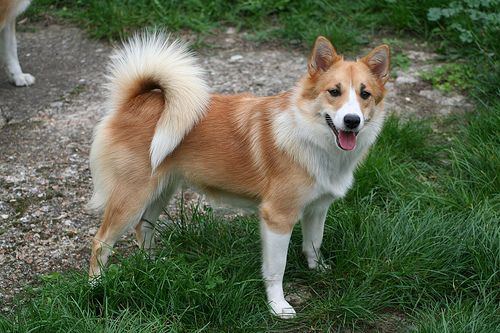

In [38]:
from IPython.display import Image
Image(train_files[78])

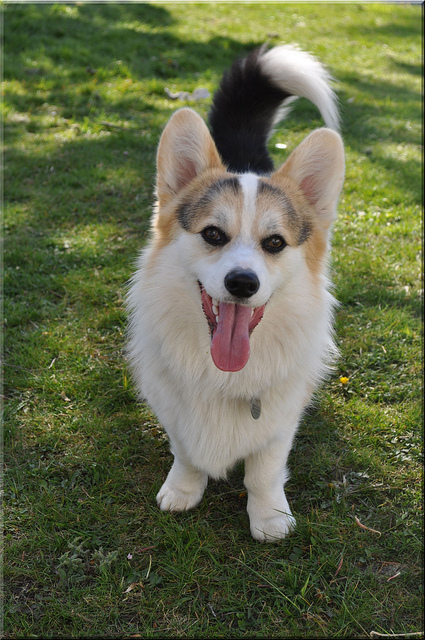

In [39]:
# What about this nice dog:
Image(train_files[100])

In [40]:
X_predict_breed(train_files[100])

'Pembroke_welsh_corgi'

In [41]:
train_files[100]

'dogImages/train\\045.Cardigan_welsh_corgi\\Cardigan_welsh_corgi_03216.jpg'

No! this is the 15% where the model is wrong. In fact it is the Cardigan_welsh_corgi!

OK, let's see how the model deals with an image of a cat. (My cat, in fact, who died 4 years ago when the cat was 18 years old):

In [43]:
X_predict_breed("Project/cat.jpg")

'Affenpinscher'

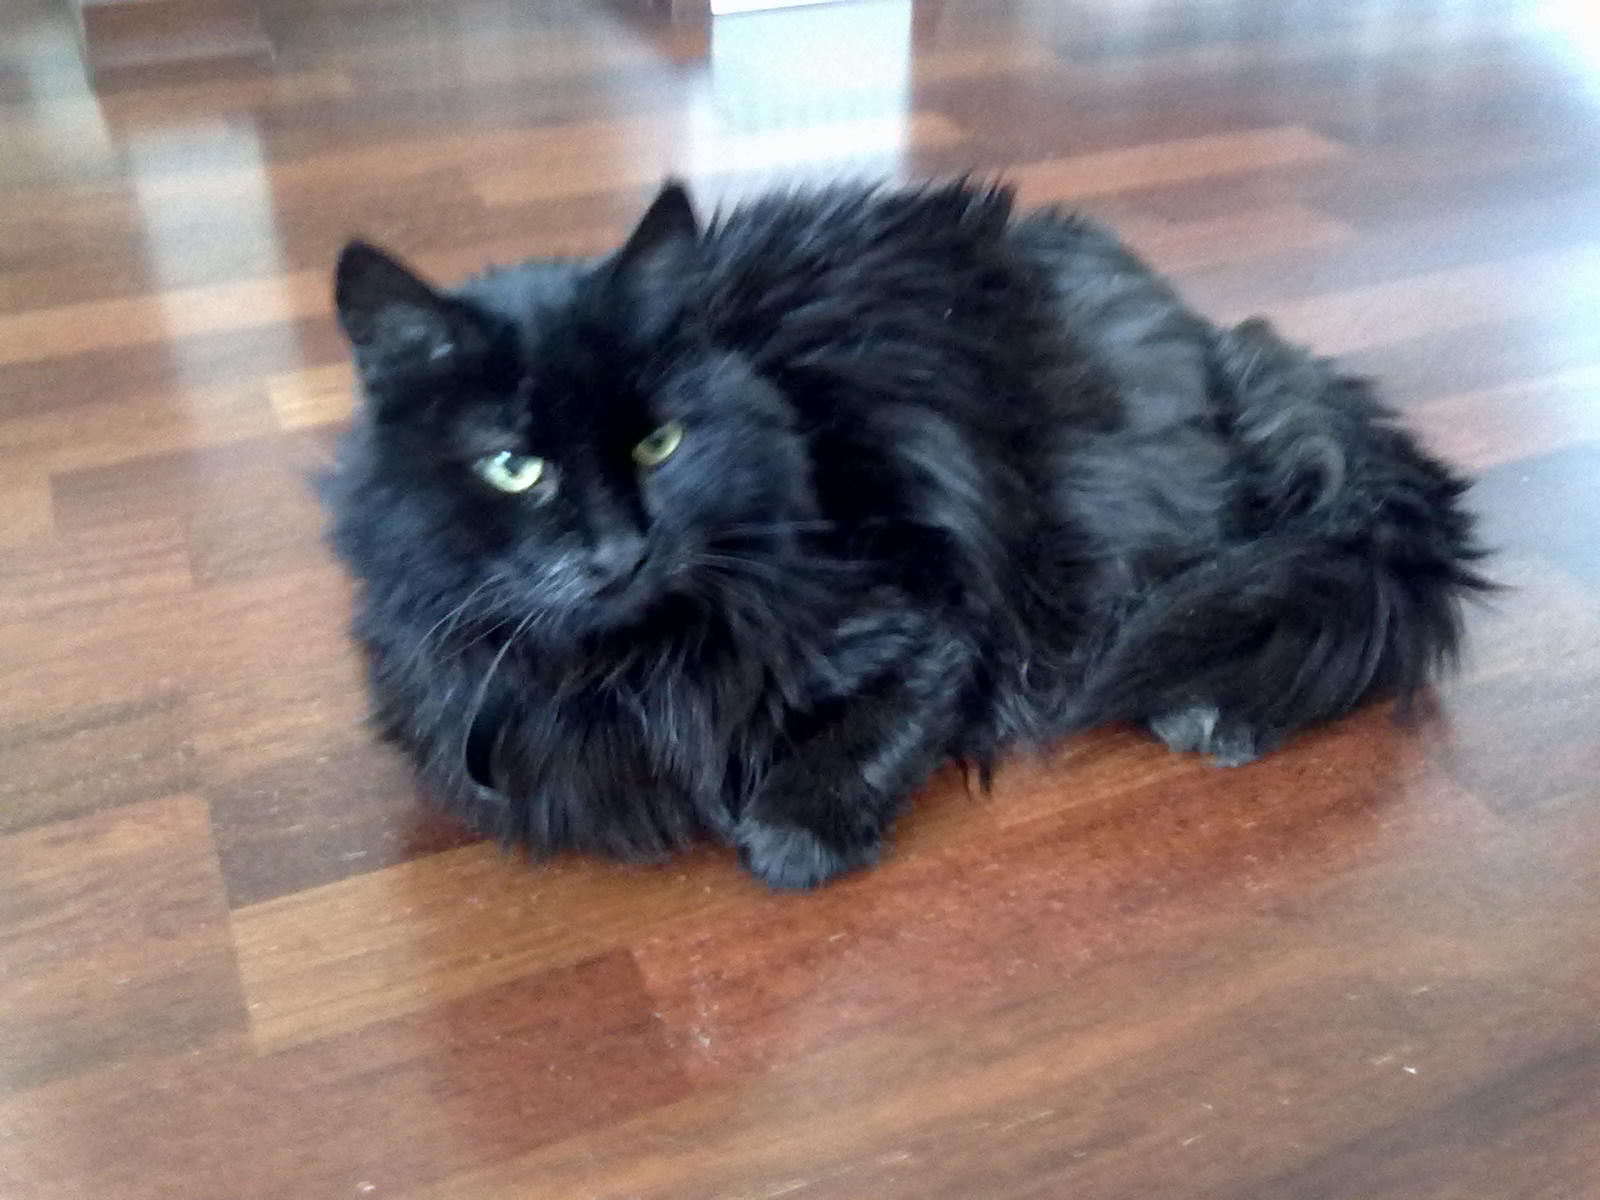

In [44]:
Image("Project/cat.jpg")

Does my cat look like this beast?:

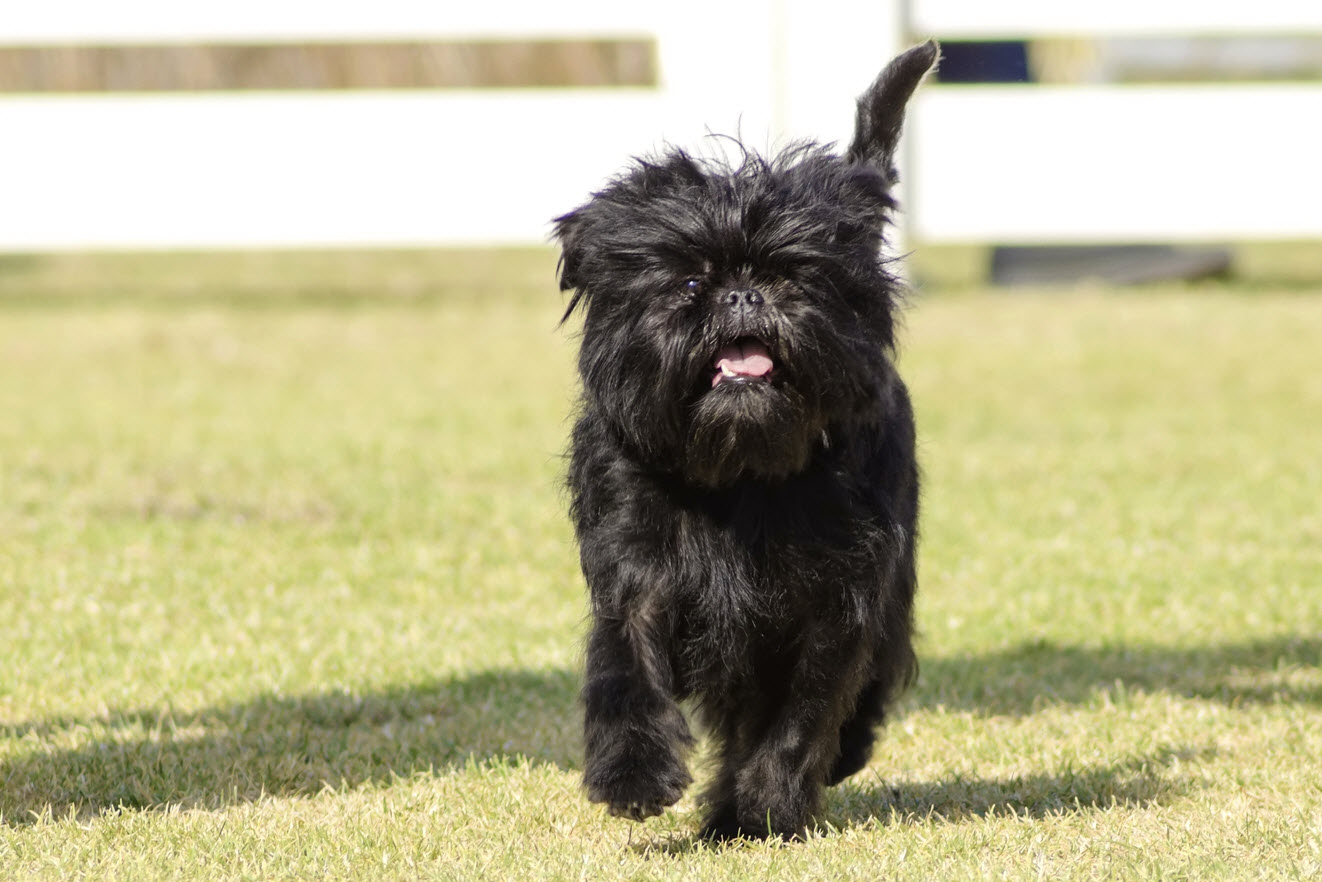

Maybe some funny algorithm "thinks" that my cat was a dog?

In [45]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

In [46]:
dog_detector("Project/cat.jpg")

True

Yes, it thinks so! How disgusting! In fact, it was another pre-trained net - ResNet50. But it doesn't matter after all

Number of faces detected: 1


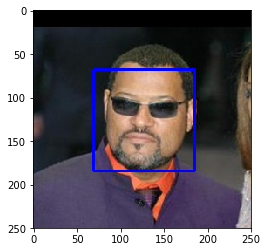

In [48]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("lfw/*/*"))
random.shuffle(human_files)


import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [49]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [50]:
# Just incase:
face_detector("Project/cat.jpg")

False

OK

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [51]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def meat_grinder(img_path):
    
    flag = True
    
    if dog_detector(img_path):
        flag = False
        print ("This is an image of a dog. Its most probable breed is:")
        print (X_predict_breed(img_path))
        
    if face_detector(img_path):
        flag = False
        print ("This is an image of a person.")
        print ("The dog breed which resembles the person is probably:", X_predict_breed(img_path))
        
    if flag:
        print ("Sorry, this is not an image of a human or a canine. Please try another imaage!")

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  


In [53]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
# Let's start from the dogs
meat_grinder("Project/d1.jpg")

This is an image of a dog. Its most probable breed is:
American_staffordshire_terrier


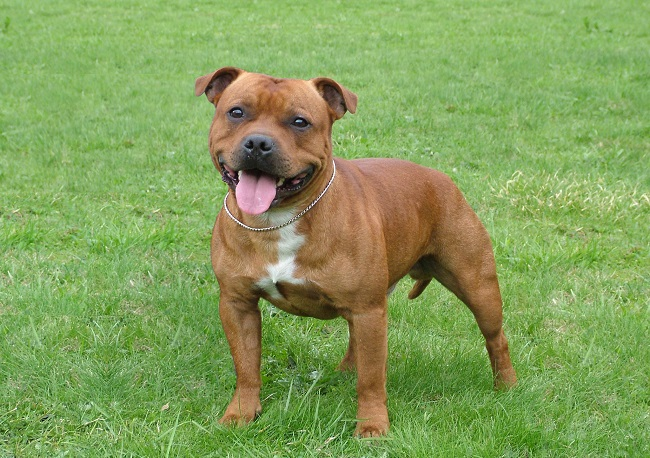

In [57]:
Image("Project/d1.jpg")

In [54]:
meat_grinder("Project/d2.jpg")

This is an image of a dog. Its most probable breed is:
Basenji


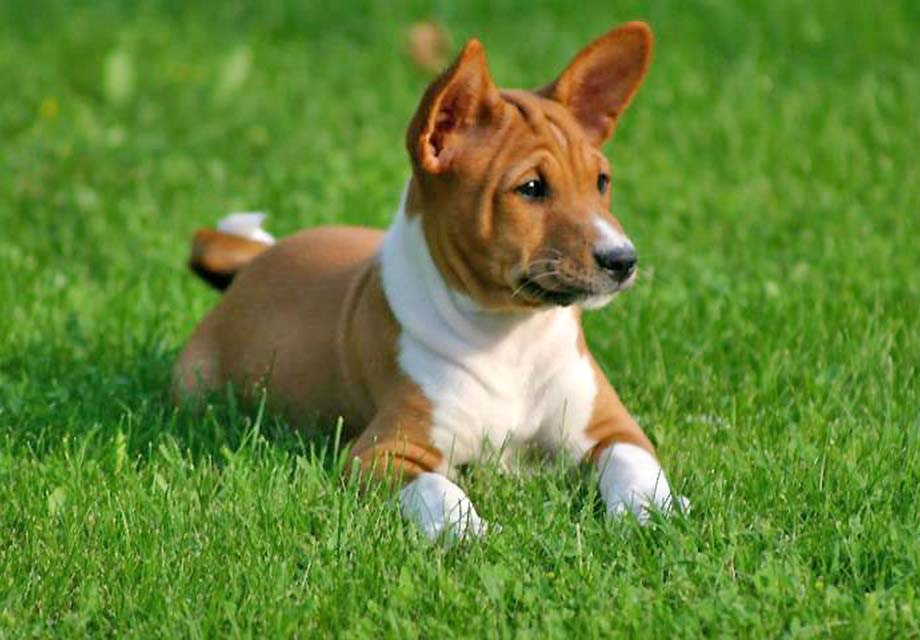

In [58]:
Image("Project/d2.jpg")

In [55]:
# Now people
meat_grinder("Project/h1.jpg")

This is an image of a person.
The dog breed which resembles the person is probably: Great_dane


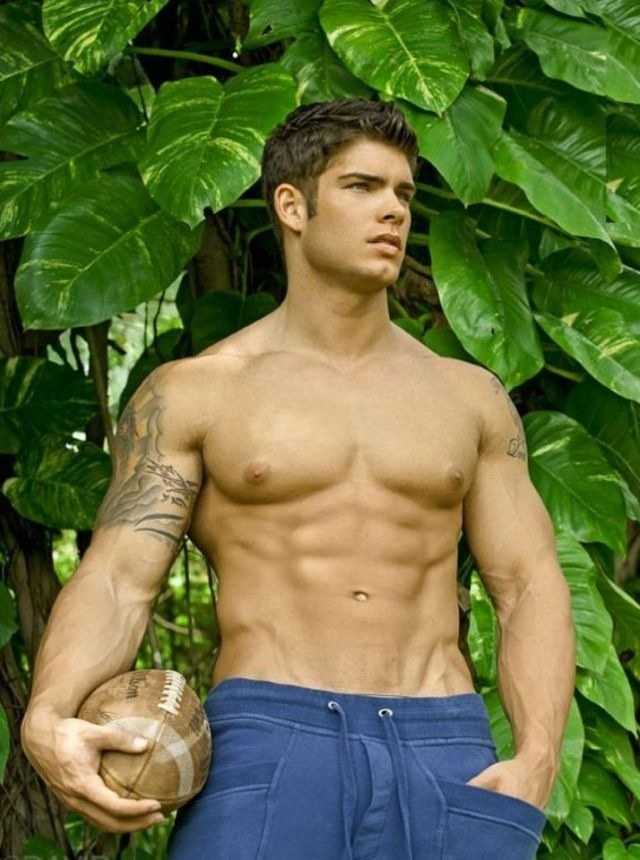

In [59]:
Image("Project/h1.jpg")

This is great dane:
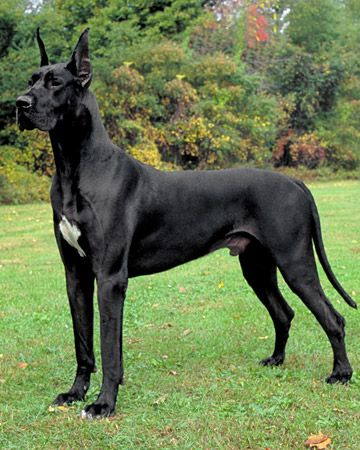

In [60]:
meat_grinder("Project/h2.jpg")

This is an image of a person.
The dog breed which resembles the person is probably: Borzoi


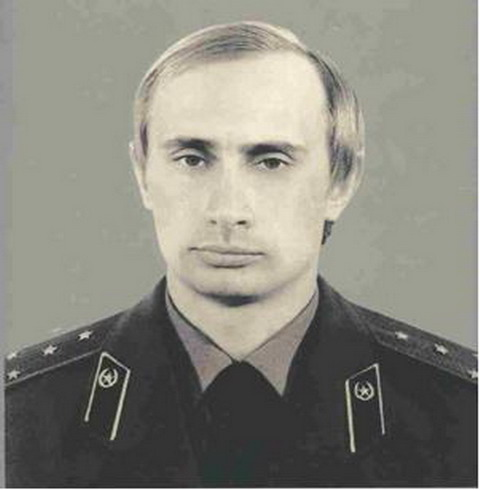

In [61]:
Image("Project/h2.jpg")

It's well known that Mr Putin likes dogs. But does he like the Borzoi breed?

Here are them:
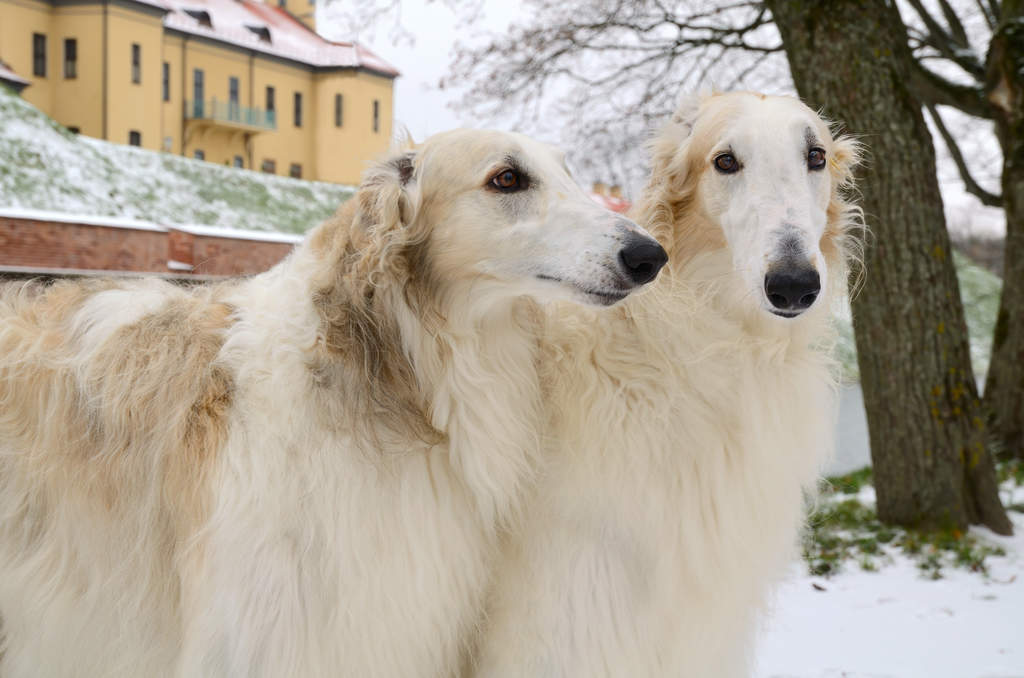

In [62]:
# Now - the other:
meat_grinder("Project/butterfly.jpg")

Sorry, this is not an image of a human or a canine. Please try another imaage!


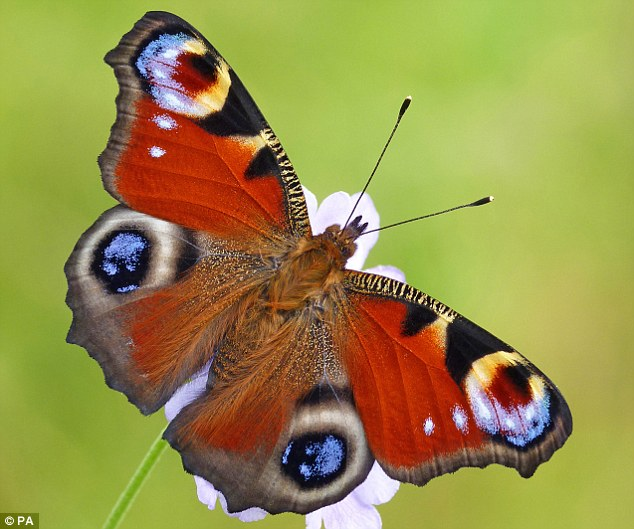

In [63]:
Image("Project/butterfly.jpg")

In [64]:
meat_grinder("Project/Smiling_Lizard.jpg")

Sorry, this is not an image of a human or a canine. Please try another imaage!


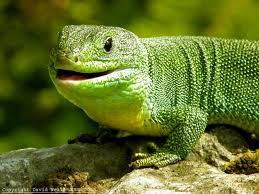

In [65]:
Image("Project/Smiling_Lizard.jpg")

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
OK. It processed all 6 images perfectly well. No need for improvement here. Probably, the interface could be more user-friendly, but I believe it's not the main purpose of the project.

Reaching the highest test accuracy seems to be a more reasonable goal. I got 85% which is great.

As an example of more user-friendly interface, I would suggest a gallery of images (the user should be able to add images to the gallery, if they want) so that the user needed just to click on an image in the gallery to get the above output (dog/ person/ other + relevant dog breed). However, I should say I am not an expert in the UX (user experience) field, so the best strategy could be to find a nice-looking website with similar functionality, then imitate (or plagiarize?) its layout  and css/ javascript files...

As for improvement of the algorithm in the sense of increasing its accuracy.

1.  The weakest point of the current algorithm is the size of the image set - it is tiny. So the major improvement lies in the area of increasing the data size by several times. (This can be done, I think, using the Google search for images, however it would be fine to ask a dog expert to look through the images of a particular dog breed produced by the search to avoid clear mistakes). My gut feeling is that actually I didn't achieve the 85%+ accuracy because the test set was heavily used to choose the best pre-trained network and parameter combination of the classifier. This means that the information from the test set "leaked" into the model chosen as the winner. A clear way to resolve the issue is to divide the test set in two equally large parts (as Kaggle does): - the first part of the test set is used for the public scoreboard and the second (secret until the very end) is used for final evaluation. If my model over-fitted to the images from the test set, the second test would lower its accuracy significantly. But how can I do this if the whole set of images is less than 9 thousand? To increase the test set at the expense of the training set? This idea does not seem very good to me. Probably, the best way is to find more dog images labelled by experts with their correspondent dog breed.

2.  A reasonable way to at least partially tackle the problem of tiny data set is to use augmentation (as I did in step 3). To benefit from the features provided by the pretrained networks, I would need to pass each augmented image through the network on the fly - this will definitely increase the running time. I couldn't attach the GPU to Keras (the necessary version of cuDNN demanded by the TF tutorial is now missing at NVIDIA website) which I describe in my post in the Forum: https://discussions.udacity.com/t/gpu-supported-tensorflow-and-keras/490685  So I had to rely on the CPU. The model with augmentation was trained for about an hour. I can imagine how long would it take if I passed every augmented image through a pretrained network. Of course, I can generate the images and pass them through the pretrained network (with cut classifying layers off) using the "raw" TensorFlow, then save the outcome to a separate file. Still this is the work to be done...

3.  Another promising idea is to create an ensemble of several algorithms (e.g. those which showed best accuracies for Xception, Inception, ResNet-50 and VGG-19) and then "vote" for the most probable outcome or to weight the prediction probabilities produced by all these algorithms then choose the most probable prediction (these weights are again the fitting parameters, of course).

4.  Use batch normalization. Thanks to very timely advice from the reviewer, I even had pleasure to experiment with batch normalization in another notebook. This trick turned out to be useful as it increased the test accuracy to 86.6% (from 85%). Here is the winnig model with just one "dense" layer in the classifier (I won't execute it here, though):

In [ ]:
from keras.layers import Activation

X_model = Sequential()

X_model.add(GlobalAveragePooling2D(input_shape=(7, 7, 2048)))

X_model.add(Dense(384, activation='linear', kernel_initializer = 'truncated_normal'))
X_model.add(BatchNormalization())
X_model.add(LeakyReLU(alpha = 0.3))
X_model.add(Dropout(0.5))


X_model.add(Dense(133, kernel_initializer = 'truncated_normal'))
X_model.add(BatchNormalization())
X_model.add(Activation('softmax'))

In this notebook the pretrained networks were used only as feature extractors. In some cases people fine tune the weights of these networks. Could it be a good idea here? I doubt: the data set is tiny, so overfitting is a concern. If someone gets a much larger set of labelled dog images - they can try.